In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\Never Give Up\4. Projects - DA\COVID19\covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.rename(columns={"Country/Region":"Country","Province/State":"Province"},inplace = True)
df["Date"]= pd.to_datetime(df["Date"])
df.fillna(0,inplace=True)
df.head()

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
top_countries = df.groupby("Country")["Confirmed"].max().nlargest(10)
print(top_countries)

Country
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     300111
Iran               293606
Name: Confirmed, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries by Total Confirmed Cases')

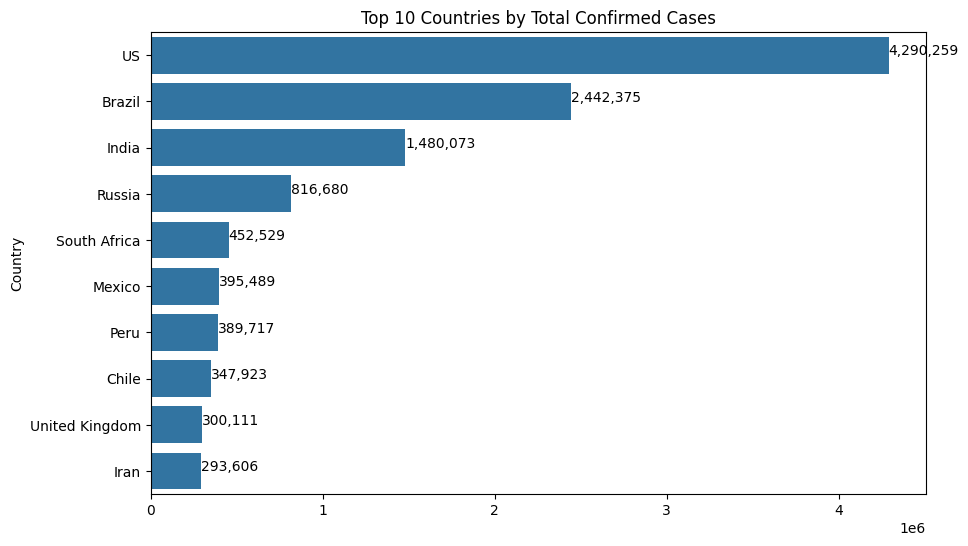

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
for i, value in enumerate(top_countries.values):
    plt.text(value, i, f'{int(value):,}') 
plt.title("Top 10 Countries by Total Confirmed Cases")


It sorts the data in descending order and returns the top results — fast and clean (.nlargest)

In [7]:
# Plotting time series for one country
import matplotlib.pyplot as plt

country_df = df[df["Country"] =="India"].groupby("Date").sum()
print(country_df.head())

           Province Country        Lat      Long  Confirmed  Deaths  \
Date                                                                  
2020-01-22        0   India  20.593684  78.96288          0       0   
2020-01-23        0   India  20.593684  78.96288          0       0   
2020-01-24        0   India  20.593684  78.96288          0       0   
2020-01-25        0   India  20.593684  78.96288          0       0   
2020-01-26        0   India  20.593684  78.96288          0       0   

            Recovered  Active       WHO Region  
Date                                            
2020-01-22          0       0  South-East Asia  
2020-01-23          0       0  South-East Asia  
2020-01-24          0       0  South-East Asia  
2020-01-25          0       0  South-East Asia  
2020-01-26          0       0  South-East Asia  


df[df["Country"] == "India"]
is just a pandas way of saying:
"From df, give me only the rows where Country is India."

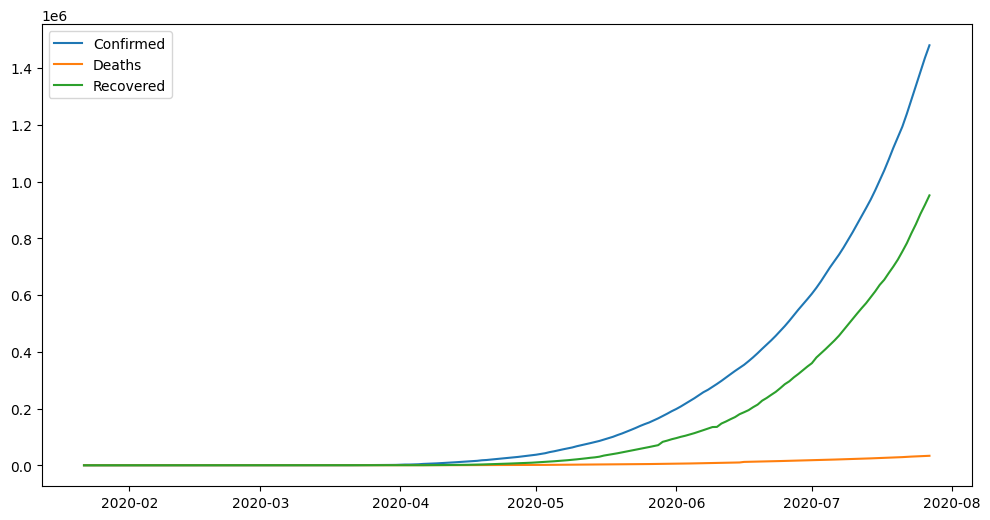

In [8]:
plt.figure(figsize=(12,6))
plt.plot(country_df.index, country_df["Confirmed"], label="Confirmed")
plt.plot(country_df.index,country_df["Deaths"],label = "Deaths")
plt.plot(country_df.index, country_df["Recovered"],label = "Recovered")
plt.legend()
plt.show()
